<a href="https://colab.research.google.com/github/ertgrulyksk/Simple-Linear-Regression/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [517]:
import pandas as pd
df = pd.read_csv("Advertising.csv")

In [518]:
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [520]:
import seaborn as sns

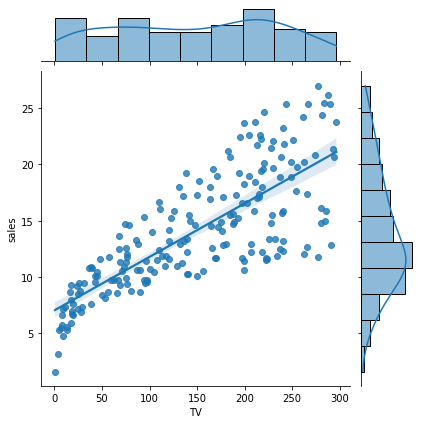

In [521]:
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg")

In [522]:
from sklearn.linear_model import LinearRegression

In [523]:
X = df[["TV"]]

In [524]:
y = df[["sales"]]

In [525]:
reg = LinearRegression()

In [526]:
model = reg.fit(X, y)

In [527]:
model

LinearRegression()

In [528]:
str(model)

'LinearRegression()'

In [529]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [530]:
model.intercept_

array([7.03259355])

In [531]:
model.coef_

array([[0.04753664]])

In [532]:
model.score(X,y)

0.611875050850071

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


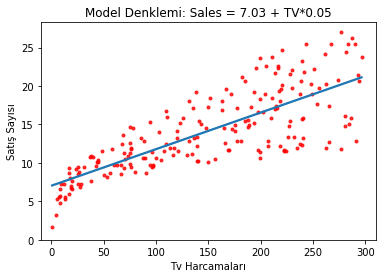

In [533]:
import matplotlib.pyplot as plt
g = sns.regplot(df["TV"],df["sales"], ci = None, scatter_kws = {"color":"r","s":9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("Tv Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [534]:
7.03 + 0.05*165

15.280000000000001

In [535]:
model.predict([[165]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[14.87613922]])

In [536]:
yeni_veri = [[0], [150], [500]]
model.predict(yeni_veri)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[ 7.03259355],
       [14.16308961],
       [30.80091377]])

In [537]:
gercek_y = y[0:10]

In [538]:
tahmin_edilen_y = pd.DataFrame(model.predict(X)[0:10])

In [539]:
hatalar = pd.concat([gercek_y,tahmin_edilen_y], axis=1)

In [540]:
hatalar.columns = ["gercek_y","tahmin_edilen_y"]

In [541]:
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [542]:
hatalar["hata"] = hatalar["gercek_y"] - hatalar["tahmin_edilen_y"]

In [543]:
hatalar

,gercek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [544]:
hatalar["hata_kareler"] = hatalar["hata"]**2

In [545]:
hatalar

,gercek_y,tahmin_edilen_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [546]:
import numpy as np
np.mean(hatalar["hata_kareler"])

9.290350329638102

In [547]:
df = pd.read_csv("Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [548]:
X = df.drop("sales", axis = 1)
y = df[["sales"]]

In [549]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [550]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [551]:
import statsmodels.api as sm

In [552]:
lm = sm.OLS(y, X)

In [553]:
model = lm.fit()

In [554]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Tue, 11 Oct 2022   Prob (F-statistic):                   2.43e-171
Time:                        21:37:20   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [555]:
lm = LinearRegression()

In [556]:
model = lm.fit(X, y)

In [557]:
model.intercept_

array([2.93888937])

In [558]:
model.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

In [559]:
2.94 + 30*0.04+10*0.19-40*0.001

5.999999999999999

In [560]:
yeni_veri = [[30],[10],[40]]

In [561]:
yeni_veri = pd.DataFrame(yeni_veri).T

In [562]:
yeni_veri

,0,1,2
0,30,10,40


In [563]:
model.predict(yeni_veri)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[6.15562918]])

In [564]:
from sklearn.metrics import mean_squared_error

In [565]:
model.predict(X)[0:10]

array([[20.52397441],
       [12.33785482],
       [12.30767078],
       [17.59782951],
       [13.18867186],
       [12.47834763],
       [11.72975995],
       [12.12295317],
       [ 3.72734086],
       [12.55084872]])

In [566]:
mse = mean_squared_error(y, model.predict(X))

In [567]:
rmse = np.sqrt(mse)

In [568]:
mse

2.784126314510936

In [569]:
rmse

1.6685701407225697

In [570]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [571]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [572]:
from sklearn.model_selection import train_test_split

In [573]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

In [574]:
X_train.head()

,TV,radio,newspaper
16,67.8,36.6,114.0
51,100.4,9.6,3.6
97,184.9,21.0,22.0
164,117.2,14.7,5.4
71,109.8,14.3,31.7


In [575]:
y_train.head()

,sales
16,12.5
51,10.7
97,15.5
164,11.9
71,12.4


In [576]:
X_test.head()

,TV,radio,newspaper
135,48.3,47.0,8.5
127,80.2,0.0,9.2
191,75.5,10.8,6.0
66,31.5,24.6,2.2
119,19.4,16.0,22.3


In [577]:
y_test.head()

,sales
135,11.6
127,8.8
191,9.9
66,9.5
119,6.6


In [578]:
lm = LinearRegression()

In [579]:
model = lm.fit(X_train, y_train)

In [580]:
np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

1.7236824822650754

In [581]:
np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

1.4312783138301641

In [582]:
from sklearn.model_selection import cross_val_score

In [583]:
cross_val_score(model,X_train,y_train,cv = 10, scoring = "neg_mean_squared_error")

array([-2.1019073 , -2.48953197, -3.09704214, -2.34694216, -3.68175761,
       -1.8691401 , -3.18173007, -4.1927349 , -2.17128376, -8.03821974])

In [584]:
np.mean(-cross_val_score(model, X_train, y_train, cv=10, scoring = "neg_mean_squared_error"))

3.3170289742341246

In [585]:
np.sqrt(np.mean(-cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

1.8212712522395242

In [586]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

In [587]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [588]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [589]:
df.shape

(263, 20)

In [590]:
ridge_model = Ridge(alpha = 0.1).fit(X_train,y_train)

In [591]:
ridge_model

Ridge(alpha=0.1)

In [592]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [593]:
ridge_model.intercept_

-4.578626905723013

In [594]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

In [595]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [596]:
ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train,y_train)
    katsayilar.append(ridge_model.coef_)

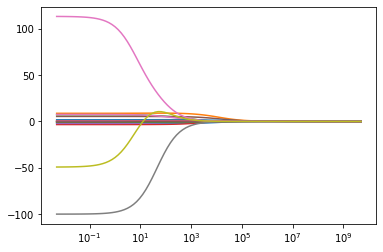

In [597]:
ax = plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale("log")

In [598]:
ridge_model = Ridge().fit(X_train, y_train)
y_pred = ridge_model.predict(X_train)

In [599]:
y_pred[0:10]

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [600]:
y_train[0:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [601]:
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
RMSE

289.34470696006565

In [604]:
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

351.3931585606316

In [606]:
y_pred = ridge_model.predict(X_test)

In [607]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

356.80829057302395

In [608]:
ridge_model = Ridge(alpha=1).fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.80829057302395

In [609]:
np.random.randint(0,1000,100)

array([716, 109,  70, 491, 215, 778, 847, 279, 741, 747,  77, 248, 646,
        86, 683, 765, 933, 644, 505, 202, 525, 897, 868, 896, 301, 637,
       625, 651, 472, 838, 363, 800, 904, 601, 528, 399, 674, 854, 858,
       580, 509, 220, 475,  72, 591, 863, 577, 879, 463, 881, 160, 121,
       707, 434, 813, 601, 110, 877, 278, 583, 342, 770, 386,  15, 871,
       236, 285, 420, 468, 155, 371, 784, 717, 120, 721, 857,  63, 833,
       783,  16, 297, 607, 128, 586, 123, 489, 760, 595, 908, 411, 108,
       469, 687, 155, 333, 429, 438, 917, 371, 210])

In [610]:
lambdalar1 = np.random.randint(0,1000,100)
lambdalar2 = 10**np.linspace(10,-2,100)*0.5

In [611]:
ridgecv = RidgeCV(alphas = lambdalar2,scoring = "neg_mean_squared_error",cv=10,normalize = True)

In [612]:
ridgecv.fit(X_train,y_train)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data,

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [613]:
ridgecv.alpha_

0.7599555414764666

In [614]:
ridge_tuned = Ridge(alpha = ridgecv.alpha_ ).fit(X_train,y_train)

In [615]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.8583047271524

In [616]:
ridgecv = RidgeCV(alphas = lambdalar1,scoring = "neg_mean_squared_error",cv=10,normalize = True)

In [617]:
ridgecv.fit(X_train,y_train)
ridgecv.alpha_

Görüntülenen çıkış son 5000 satıra kısaltıldı.
Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data,

12

In [618]:
ridge_tuned = Ridge(alpha = ridgecv.alpha_ ).fit(X_train,y_train)

In [619]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.31565731731973

In [620]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

In [621]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [622]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [623]:
df.shape

(263, 20)

In [624]:
lasso_model=Lasso().fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.257e+06, tolerance: 3.899e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [625]:
lasso_model

Lasso()

In [626]:
lasso_model.intercept_

-5.587450677336506

In [627]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [628]:
alphas1 = np.random.randint(0,1000,100)
alphas2 = 10**np.linspace(10,-2,100)*0.5
ridge_model = Ridge()
coefs = []

for i in alphas2:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train,y_train)
    coefs.append(ridge_model.coef_)

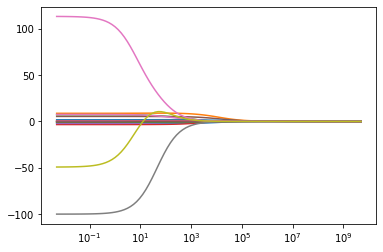

In [629]:
ax = plt.gca()
ax.plot(alphas2,coefs)
ax.set_xscale("log")

In [630]:
lasso_model

Lasso()

In [631]:
lasso_model.predict(X_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [632]:
lasso_model.predict(X_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [633]:
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.0975884554034

In [634]:
r2_score(y_test,y_pred)

0.41422798132366156

In [635]:
lasso_cv_model = LassoCV(cv=10,max_iter=100000).fit(X_train,y_train)

In [636]:
lasso_cv_model.alpha_

563.4670501833854

In [637]:
lasso_tuned = Lasso().set_params(alpha=lasso_cv_model.alpha_).fit(X_train,y_train)

In [638]:
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

373.5957225069795

In [639]:
lasso_cv_model = LassoCV(alphas= alphas1,cv=10,max_iter=100000).fit(X_train,y_train)

In [640]:
lasso_cv_model.alpha_

181

In [641]:
lasso_tuned = Lasso().set_params(alpha=lasso_cv_model.alpha_).fit(X_train,y_train)

In [642]:
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

362.856815591621

In [643]:
pd.Series(lasso_tuned.coef_,index=X_train.columns)

AtBat         -1.157353
Hits           5.609805
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.843479
Years          0.000000
CAtBat        -0.168643
CHits          0.221440
CHmRun        -0.000000
CRuns          1.072650
CRBI           0.473827
CWalks        -0.221290
PutOuts        0.273137
Assists        0.179546
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

In [644]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [645]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [646]:
enet_model = ElasticNet().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.488e+06, tolerance: 3.899e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [647]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [648]:
enet_model.intercept_

-6.465955602112331

In [649]:
enet_model.predict(X_train)[0:10]

array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566, 997.76095723,  99.78828622, 311.33763086,
       418.50335021, 879.9502608 ])

In [650]:
enet_model.predict(X_test)[0:10]

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123])

In [651]:
y_pred = enet_model.predict(X_test)

In [652]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.1676548181246

In [653]:
r2_score(y_test, y_pred)

0.41070222469326867

In [654]:
enet_cv_model = ElasticNetCV(cv=10).fit(X_train, y_train)

In [655]:
enet_cv_model.alpha_

5230.7647364798695

In [656]:
enet_cv_model.coef_

array([ 0.62845434,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.09788752,  0.        ,
        0.27265769,  0.19270075,  0.00758665,  0.3106529 ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

In [657]:
enet_cv_model.intercept_

-38.5194055839429

In [658]:
enet_tuned = ElasticNet(enet_cv_model.alpha_).fit(X_train, y_train)

In [659]:
enet_tuned

ElasticNet(alpha=5230.7647364798695)

In [660]:
y_pred = enet_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

394.15280563218795